## Description  
Helper notebook to create graphs from test data. Notice that this notebook is a bit sprawling. Find the graph you're looking to reproduce, find the Jupyter cell responsible in it's creation and you'll have the correct code block.

For GPU PEARC paper we're using colab. I'm writing Dataframes by hand, you can use .csv and import, but colab storage is ephemeral, so it would be recycled.

You can also add whatever files you have in csvs in https://github.com/tapis-project/tapis-gpu-paper.

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import csv

<Figure size 1920x1440 with 0 Axes>

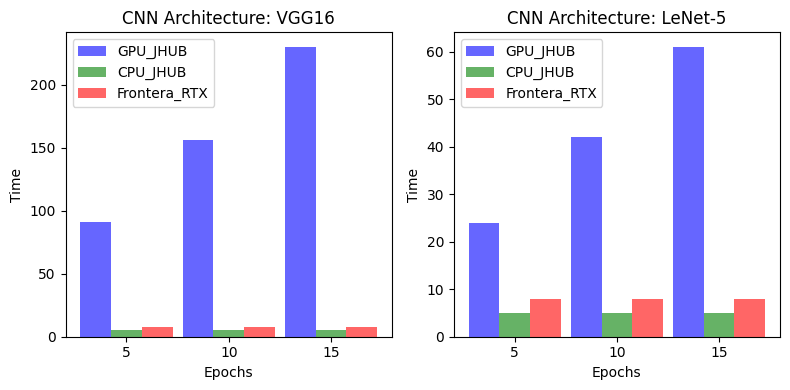

In [54]:
Aimport pandas as pd
import matplotlib.pyplot as plt

## Create the DataFrame
df = pd.DataFrame({
    'compute': ['GPU_JHUB', 'GPU_JHUB', 'GPU_JHUB', 'GPU_JHUB', 'GPU_JHUB', 'GPU_JHUB', 'CPU_JHUB', 'CPU_JHUB', 'CPU_JHUB', 'CPU_JHUB', 'CPU_JHUB', 'CPU_JHUB', 'Frontera_RTX', 'Frontera_RTX', 'Frontera_RTX', 'Frontera_RTX', 'Frontera_RTX', 'Frontera_RTX'],
    'CNN arch': ['VGG16', 'VGG16', 'VGG16', 'LeNet-5', 'LeNet-5', 'LeNet-5', 'VGG16', 'VGG16', 'VGG16', 'LeNet-5', 'LeNet-5', 'LeNet-5', 'VGG16', 'VGG16', 'VGG16', 'LeNet-5', 'LeNet-5', 'LeNet-5'],
    'epochs': [5, 10, 15, 5, 10, 15, 5, 10, 15, 5, 10, 15, 5, 10, 15, 5, 10, 15],
    'time': [91, 156, 230, 24, 42, 61, 5, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8],
    'validation accuracy': [0.50, 0.50, 0.50, 0.78, 0.78, 0.78, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]
})

# Change size/resolution
plt.figure(dpi=300)

# Create a color map for the compute types
color_map = {'GPU_JHUB': 'blue', 'CPU_JHUB': 'green', 'Frontera_RTX': 'red'}

# Define the width of the bars and the positions
bar_width = 0.3
positions = [1, 2, 3]  # Positions for the bars

# Create subplots for each CNN architecture
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for i, arch in enumerate(df['CNN arch'].unique()):
    subset = df[df['CNN arch'] == arch]
    for j, compute in enumerate(subset['compute'].unique()):
        compute_subset = subset[subset['compute'] == compute]
        axs[i].bar([p + j * bar_width for p in positions], compute_subset['time'], color=color_map[compute], label=compute, alpha=0.6, width=bar_width)
    axs[i].set_title(f'CNN Architecture: {arch}')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Time')
    axs[i].set_xticks([p + bar_width for p in positions])
    axs[i].set_xticklabels([5, 10, 15])
    axs[i].legend()

plt.tight_layout()
plt.savefig('jhub.png', dpi=180)



---
---
---
---
---
---


## Everything below this is for example's sake.
Take styles, colors, legends, axis labels from below. This is using `matplotlib pyplot`.

[Docs are linked to me!](https://matplotlib.org/stable/api/pyplot_summary.html)

---
---
---

In [ ]:
# We don't use CSV as data here is ephermeral. The data is also relatively small, so we can write it out
## Read CSV, print pandas object we can interact with easily
df = pd.read_csv('epochs.csv', delimiter=',', header=0)
print(df)
print()
print(df.keys())

## Neo4j Tests

In [ ]:
df["iteration"]

In [ ]:
df["time_to_get - pods to host"]

In [ ]:
df.columns

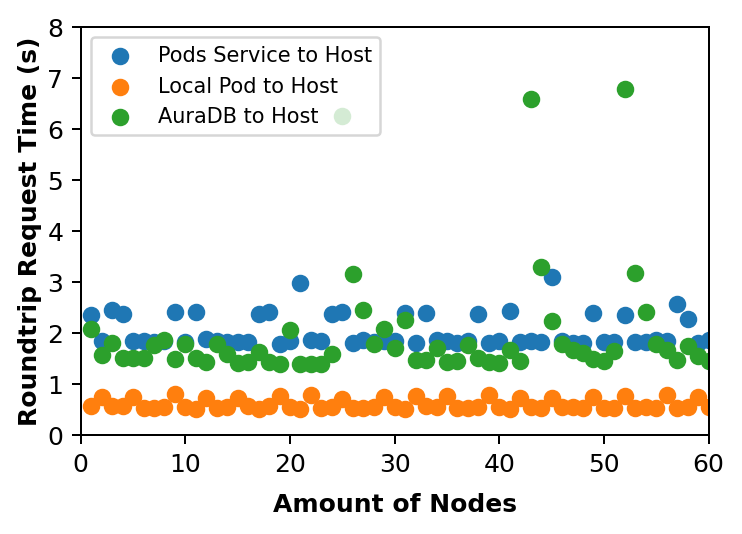

In [ ]:
df = pd.read_csv('experiments - Neo4j 10k.csv', delimiter=',', header=0)
plt.figure(figsize=(4.5,3), dpi=180)

plt.scatter(df['iteration'], df['time_to_get - pods to host'])
plt.scatter(df['iteration'], df['time_to_get - localhost'])
plt.scatter(df['iteration'], df['time_to_get - AuraDB'])

plt.ylim([0, 8])
plt.xlim([0, 60])
plt.legend(['Pods Service to Host', 'Local Pod to Host', 'AuraDB to Host'], fontsize='small', )

plt.text(30, -1.5, 'Amount of Nodes', ha='center', weight='bold')
plt.text(-6, 4, 'Roundtrip Request Time (s)', va='center', rotation='vertical', weight='bold')
plt.savefig('rateManualGraph.png', dpi=180)

/home/cgarcia/.local/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:blue'` for same effect.
  warnings.warn(msg, FutureWarning)


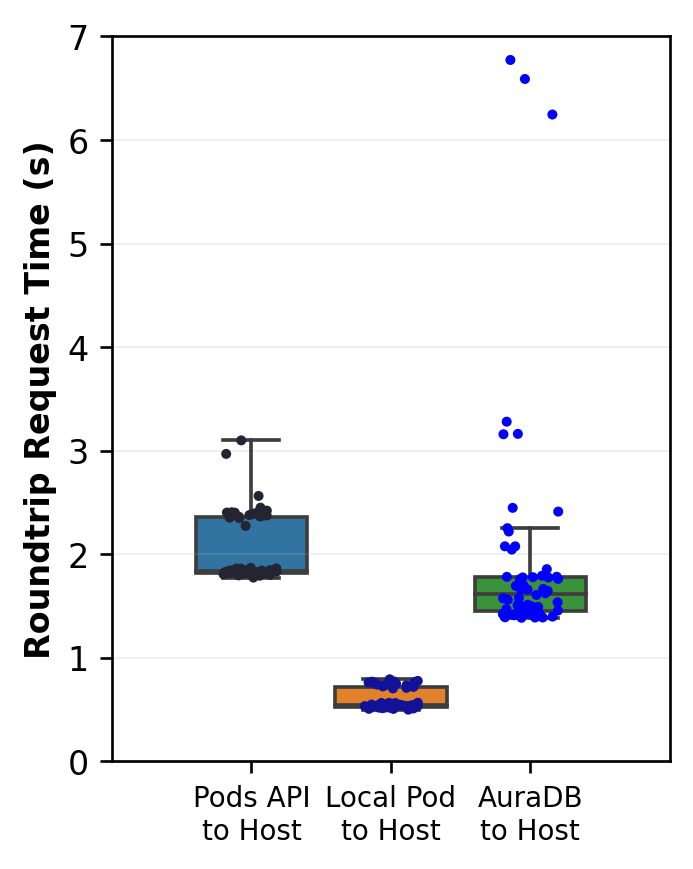

In [ ]:
df10 = pd.read_csv('experiments - Neo4j 10k.csv', delimiter=',', header=0)
df200 = pd.read_csv('experiments - Neo4j 200k.csv', delimiter=',', header=0)
df500 = pd.read_csv('experiments - Neo4j 500k.csv', delimiter=',', header=0)

plt.figure(figsize=(3,4), dpi=240)

#plt.boxplot([df['time_to_get - pods to host'], df['time_to_get - localhost'], df['time_to_get - AuraDB']])
#plt.boxplot(df['time_to_get - localhost'])
#plt.boxplot(df['time_to_get - AuraDB'])
data = [df10['time_to_get - pods to host'], df10['time_to_get - localhost'], df10['time_to_get - AuraDB']]
ax = sns.boxplot(data=data, fliersize=0, linewidth = 1.1)
# add stripplot
ax = sns.stripplot(data=data, color="blue", jitter=0.2, size=3)

#ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.grid(visible=True, linewidth=.11, axis="y")
plt.ylim([0, 7])
plt.xlim([-1, 3])
plt.xticks(ticks=[0,1,2],labels=['Pods API\nto Host', 'Local Pod\nto Host', 'AuraDB\nto Host'], rotation=0, fontsize='small')
plt.ylabel('Roundtrip Request Time (s)', va='center', rotation='vertical', weight='bold', labelpad=8)
plt.savefig('10kneo.png', dpi=240, bbox_inches='tight')

/home/cgarcia/.local/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:blue'` for same effect.
  warnings.warn(msg, FutureWarning)


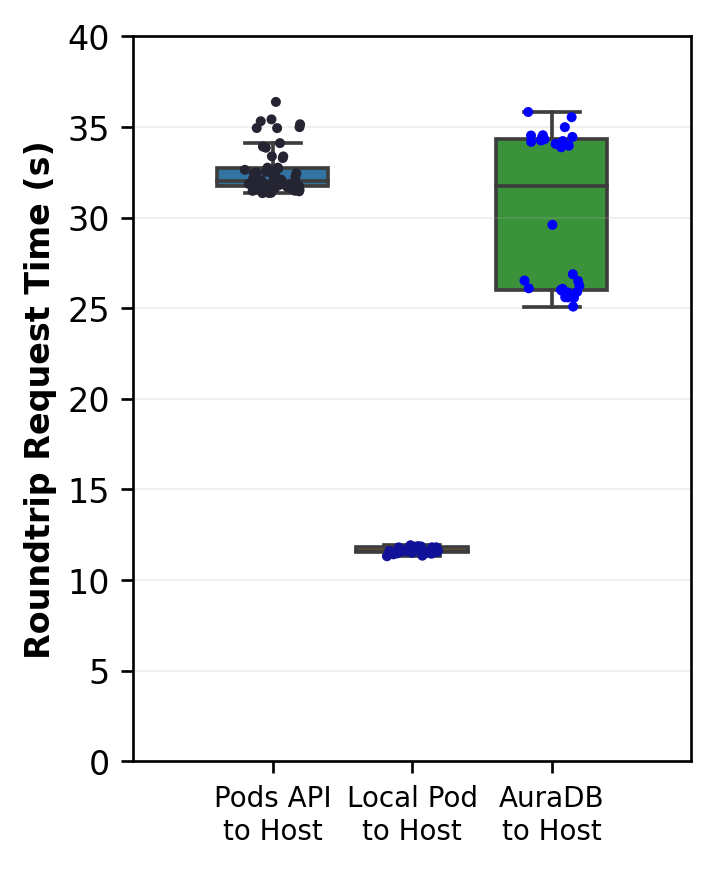

In [ ]:
df = pd.read_csv('experiments - Neo4j 200k.csv', delimiter=',', header=0)
plt.figure(figsize=(3,4), dpi=240)

#plt.boxplot([df['time_to_get - pods to host'], df['time_to_get - localhost'], df['time_to_get - AuraDB']])
#plt.boxplot(df['time_to_get - localhost'])
#plt.boxplot(df['time_to_get - AuraDB'])
data = [df['time_to_get - pods to host'], df['time_to_get - localhost'], df['time_to_get - AuraDB']]
ax = sns.boxplot(data=data, fliersize=0, linewidth = 1.1)
# add stripplot
ax = sns.stripplot(data=data, color="blue", jitter=0.2, size=3)

#ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.grid(visible=True, linewidth=.11, axis="y")
plt.ylim([0, 40])
plt.xlim([-1, 3])
plt.xticks(ticks=[0,1,2],labels=['Pods API\nto Host', 'Local Pod\nto Host', 'AuraDB\nto Host'], rotation=0, fontsize='small')
plt.ylabel('Roundtrip Request Time (s)', va='center', rotation='vertical', weight='bold', labelpad=8)
plt.savefig('200kneo.png', dpi=240, bbox_inches='tight')

/home/cgarcia/.local/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:blue'` for same effect.
  warnings.warn(msg, FutureWarning)


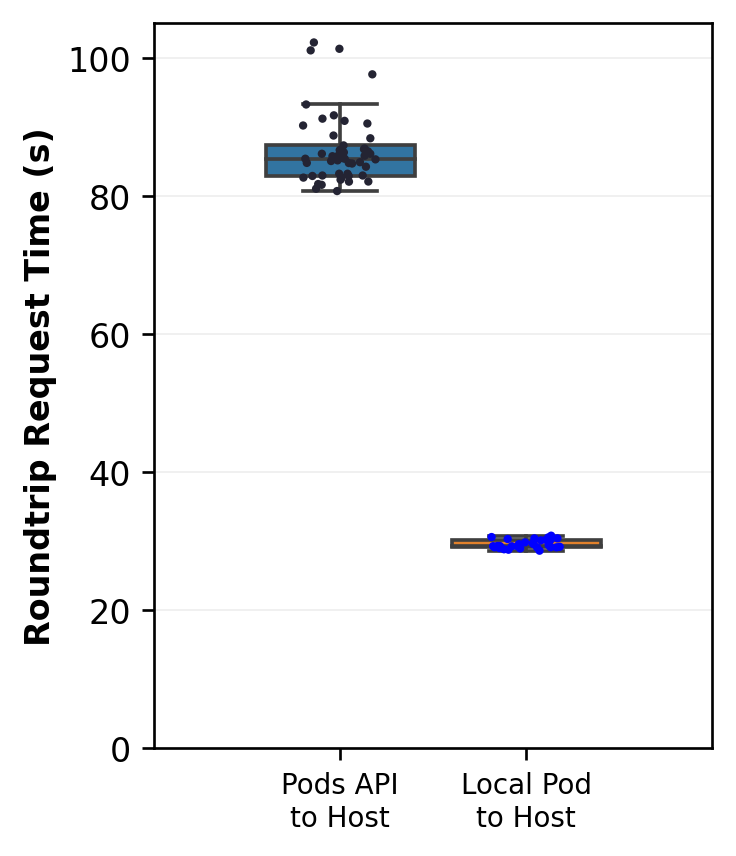

In [ ]:
df = pd.read_csv('experiments - Neo4j 500k.csv', delimiter=',', header=0)
plt.figure(figsize=(3,4), dpi=240)

#plt.boxplot([df['time_to_get - pods to host'], df['time_to_get - localhost'], df['time_to_get - AuraDB']])
#plt.boxplot(df['time_to_get - localhost'])
#plt.boxplot(df['time_to_get - AuraDB'])
data = [df['time_to_get - pods to host'], df['time_to_get - localhost']]
ax = sns.boxplot(data=data, fliersize=0, linewidth = 1.1)
# add stripplot
ax = sns.stripplot(data=data, color="blue", jitter=0.2, size=2.5)

#ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.grid(visible=True, linewidth=.11, axis="y")
plt.ylim([0, 105])
plt.xlim([-1, 2])
plt.xticks(ticks=[0,1],labels=['Pods API\nto Host', 'Local Pod\nto Host'], rotation=0, fontsize='small')
plt.ylabel('Roundtrip Request Time (s)', va='center', rotation='vertical', weight='bold', labelpad=8)
plt.savefig('500kneo.png', dpi=240, bbox_inches='tight')

<Figure size 1680x560 with 0 Axes>

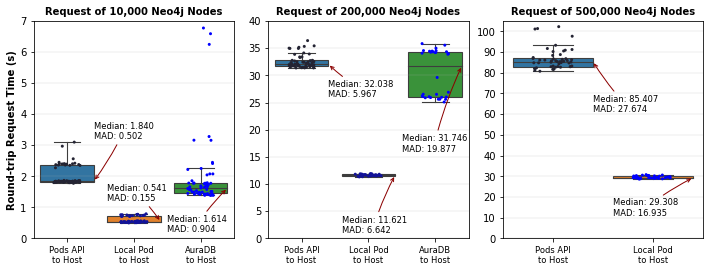

In [ ]:
### Neo4j
figsize = (12, 4)
dpi = 140

plt.figure(figsize=figsize, dpi=dpi)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, gridspec_kw={'hspace': 1, 'wspace': .17}, figsize=figsize)

df10 = pd.read_csv('experiments - Neo4j 10k.csv', delimiter=',', header=0)
df200 = pd.read_csv('experiments - Neo4j 200k.csv', delimiter=',', header=0)
df500 = pd.read_csv('experiments - Neo4j 500k.csv', delimiter=',', header=0)

data1 = [df10['time_to_get - pods to host'], df10['time_to_get - localhost'], df10['time_to_get - AuraDB']]
data2 = [df200['time_to_get - pods to host'], df200['time_to_get - localhost'], df200['time_to_get - AuraDB']]
data3 = [df500['time_to_get - pods to host'], df500['time_to_get - localhost']]

# Subplot 1 settings
bp1 = sns.boxplot(ax=ax1, data=data1, fliersize=0, linewidth = 1.1)
sp1 = sns.stripplot(ax=ax1, data=data1, palette='dark:blue', jitter=0.2, size=3)
ax1.grid(visible=True, linewidth=.2, axis="y")
ax1.set_ylim([0, 7])
ax3.set_xlim([-.5, 2.5])
labels = ['Pods API\nto Host', 'Local Pod\nto Host', 'AuraDB\nto Host']
ax1.set_xticks(ticks=[0,1,2],labels=labels, rotation=0, fontsize='small')
ax1.set_ylabel('Round-trip Request Time (s)', va='center', rotation='vertical', weight='bold', labelpad=8)
ax1.set_title(label='Request of 10,000 Neo4j Nodes', fontsize='medium', loc='center', weight='bold')
median1 = 1.84002347
mad1 = 0.5018949148
median2 = 0.5405572378
mad2 = 0.1547657843
median3 = 1.614416371
mad3 = 0.9041313572
ax1.annotate(f'Median: {median1:.3f}\nMAD: {mad1:.3f}', fontsize='small', xy=(0.4, median1), xytext=(.4, 3.2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))
ax1.annotate(f'Median: {median2:.3f}\nMAD: {mad2:.3f}', fontsize='small', xy=(1.4, median2), xytext=(.6, 1.2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))
ax1.annotate(f'Median: {median3:.3f}\nMAD: {mad3:.3f}', fontsize='small', xy=(2.4, median3), xytext=(1.5, .2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))

# Subplot 2 settings
bp2 = sns.boxplot(ax=ax2, data=data2, fliersize=0, linewidth = 1.1)
sp2 = sns.stripplot(ax=ax2, data=data2, palette='dark:blue', jitter=0.2, size=3)
ax2.grid(visible=True, linewidth=.2, axis="y")
ax2.set_ylim([0, 40])
ax3.set_xlim([-.5, 2.5])
plt.xticks(ticks=[0,1,2],labels=labels, rotation=0, fontsize='small')
labels = ['Pods API\nto Host', 'Local Pod\nto Host', 'AuraDB\nto Host']
ax2.set_xticks(ticks=[0,1,2],labels=labels, rotation=0, fontsize='small')
ax2.set_title(label='Request of 200,000 Neo4j Nodes', fontsize='medium', loc='center', weight='bold')
median1 = 32.03791204
mad1 = 5.967487202
median2 = 11.62064737
mad2 = 6.642310508
median3 = 31.74635729
mad3 = 19.87708111
ax2.annotate(f'Median: {median1:.3f}\nMAD: {mad1:.3f}', fontsize='small', xy=(0.4, median1), xytext=(.4, 26), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))
ax2.annotate(f'Median: {median2:.3f}\nMAD: {mad2:.3f}', fontsize='small', xy=(1.4, median2), xytext=(.6, 1), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))
ax2.annotate(f'Median: {median3:.3f}\nMAD: {mad3:.3f}', fontsize='small', xy=(2.4, median3), xytext=(1.5, 16), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))

# Subplot 3 settings
bp3 = sns.boxplot(ax=ax3, data=data3, fliersize=0, linewidth = 1.1)
sp3 = sns.stripplot(ax=ax3, data=data3, palette='dark:blue', jitter=0.2, size=3)
ax3.grid(visible=True, linewidth=.2, axis="y")
ax3.set_ylim([0, 105])
ax3.set_xlim([-.5, 1.5])
labels = ['Pods API\nto Host', 'Local Pod\nto Host']
ax3.set_yticks(ticks=[i for i in range(0, 105, 10)], rotation=0, fontsize='small')
ax3.set_xticks(ticks=[0,1],labels=labels, rotation=0, fontsize='small')
ax3.set_title(label='Request of 500,000 Neo4j Nodes', fontsize='medium', loc='center', weight='bold')
median1 = 85.40700501
mad1 = 27.67435579
median2 = 29.30752427
mad2 = 16.93517478
ax3.annotate(f'Median: {median1:.3f}\nMAD: {mad1:.3f}', fontsize='small', xy=(0.4, median1), xytext=(.4, 61), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))
ax3.annotate(f'Median: {median2:.3f}\nMAD: {mad2:.3f}', fontsize='small', xy=(1.4, median2), xytext=(.6, 11), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))

plt.savefig('tripleneo.png', dpi=dpi)

<Figure size 1400x560 with 0 Axes>

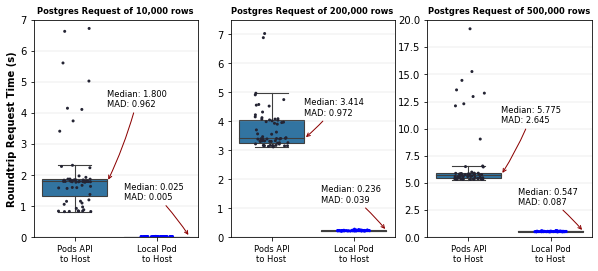

In [ ]:
### POSTGRES
figsize = (10, 4)
dpi = 140

plt.figure(figsize=figsize, dpi=dpi)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, gridspec_kw={'hspace': 1, 'wspace': .2}, figsize=figsize)

df10 = pd.read_csv('experiments - Postgres 10k.csv', delimiter=',', header=0)
df200 = pd.read_csv('experiments - Postgres 200k.csv', delimiter=',', header=0)
df500 = pd.read_csv('experiments - Postgres 500k.csv', delimiter=',', header=0)

data1 = [df10['time_to_get - pods to host'], df10['time_to_get - localhost']]
data2 = [df200['time_to_get - pods to host'], df200['time_to_get - localhost']]
data3 = [df500['time_to_get - pods to host'], df500['time_to_get - localhost']]

# Subplot 1 settings
bp1 = sns.boxplot(ax=ax1, data=data1, fliersize=0, linewidth = 1.1, showmeans=False, meanline=True)
sp1 = sns.stripplot(ax=ax1, data=data1, palette='dark:blue', jitter=0.2, size=3)
ax1.grid(visible=True, linewidth=.2, axis="y")
ax1.set_ylim([0, 7])
ax3.set_xlim([-.5, 1.5])
labels = ['Pods API\nto Host', 'Local Pod\nto Host']
ax1.set_xticks(ticks=[0,1],labels=labels, rotation=0, fontsize='small')
ax1.set_ylabel('Roundtrip Request Time (s)', va='center', rotation='vertical', weight='bold', labelpad=8)
ax1.set_title(label='Postgres Request of 10,000 rows', fontsize='small', loc='center', weight='bold')
median1 = 1.799943611
mad1 = 0.9617977633
median2 = 0.0248807529
mad2 = 0.004820583413
ax1.annotate(f'Median: {median1:.3f}\nMAD: {mad1:.3f}', fontsize='small', xy=(0.4, median1), xytext=(.4, 4.2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))
ax1.annotate(f'Median: {median2:.3f}\nMAD: {mad2:.3f}', fontsize='small', xy=(1.4, median2), xytext=(.6, 1.2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))

# Subplot 2 settings
bp2 = sns.boxplot(ax=ax2, data=data2, fliersize=0, linewidth = 1.1)
sp2 = sns.stripplot(ax=ax2, data=data2, palette='dark:blue', jitter=0.2, size=3)
ax2.grid(visible=True, linewidth=.2, axis="y")
ax2.set_ylim([0, 7.5])
ax3.set_xlim([-.5, 1.5])
labels = ['Pods API\nto Host', 'Local Pod\nto Host']
ax2.set_xticks(ticks=[0,1],labels=labels, rotation=0, fontsize='small')
ax2.set_title(label='Postgres Request of 200,000 rows', fontsize='small', loc='center', weight='bold')
median1 = 3.413950017
mad1 = 0.9717296865
median2 = 0.235811512
mad2 = 0.0388252518
ax2.annotate(f'Median: {median1:.3f}\nMAD: {mad1:.3f}', fontsize='small', xy=(0.4, median1), xytext=(.4, 4.2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))
ax2.annotate(f'Median: {median2:.3f}\nMAD: {mad2:.3f}', fontsize='small', xy=(1.4, median2), xytext=(.6, 1.2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))

# Subplot 3 settings
bp3 = sns.boxplot(ax=ax3, data=data3, fliersize=0, linewidth = 1.1)
sp3 = sns.stripplot(ax=ax3, data=data3, palette='dark:blue', jitter=0.2, size=3)
ax3.grid(visible=True, linewidth=.2, axis="y")
ax3.set_ylim([0, 20])
ax3.set_xlim([-.5, 1.5])
labels = ['Pods API\nto Host', 'Local Pod\nto Host']
ax3.set_xticks(ticks=[0,1],labels=labels, rotation=0, fontsize='small')
ax3.set_title(label='Postgres Request of 500,000 rows', fontsize='small', loc='center', weight='bold')
median1 = 5.775088462
mad1 = 2.645450717
median2 = 0.5474927435
mad2 = 0.0868646292
ax3.annotate(f'Median: {median1:.3f}\nMAD: {mad1:.3f}', fontsize='small', xy=(0.4, median1), xytext=(.4, 10.5), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))
ax3.annotate(f'Median: {median2:.3f}\nMAD: {mad2:.3f}', fontsize='small', xy=(1.4, median2), xytext=(.6, 3), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.05", color="darkred"))

plt.savefig('triplepostgres.png', dpi=dpi)

In [ ]:
list(df200['time_to_get - localhost'])

['0.2846334483',
 '0.2368836608',
 '0.2366993921',
 '0.2408127729',
 '0.2341977488',
 '0.2200403549',
 '0.2509817919',
 '0.2360260263',
 '0.2232256597',
 '0.2186923493',
 '0.2423889693',
 '0.241300826',
 '0.2425746871',
 '0.2496443167',
 '0.2237563543',
 '0.22676278',
 '0.2313260417',
 '0.2226529056',
 '0.225642873',
 '0.256737018',
 '0.2514632829',
 '0.2472678563',
 '0.2422432816',
 '0.2288933806',
 '0.2355969977',
 '0.2285732348',
 '0.2445057957',
 '0.229615516',
 '0.2274994785',
 '0.239304631',
 '0.2369032484',
 '0.2340296675',
 '0.2449337495',
 '0.2375392411',
 '0.2384849088',
 '0.2219186304',
 '0.2298933789',
 '0.2207476115',
 '0.2281450601',
 '0.2512552738',
 '0.2209125347',
 '0.2690365044',
 '0.2217163127',
 '0.2406941168',
 '0.2444044258',
 '0.2392780269',
 '0.2313238466',
 '0.2334629754',
 '0.2339426028',
 '0.256404792',
 '0.2269527065',
 '0.2434443478',
 '0.2468929775',
 '0.2312260633',
 '0.245207211',
 '0.2353698341',
 '0.2338615274',
 '0.2304260889',
 '0.2387563',
 '0.22014

In [ ]:
df10 = pd.read_csv('experiments - Postgres 10k.csv', delimiter=',', header=0)
df10

,iteration,rows_retrieved,time_to_get - pods to host,time_to_get - localhost,time_to_get - pods to kube vm
0,1,10000,0.935186,0.032774,NaN
1,2,10000,0.843976,0.024172,NaN
2,3,10000,0.829752,0.026730,NaN
3,4,10000,0.836781,0.025320,NaN
4,5,10000,0.854299,0.023327,NaN
5,6,10000,0.847739,0.025861,NaN
6,7,10000,0.833220,0.029097,NaN
7,8,10000,0.888873,0.025369,NaN
8,9,10000,2.321603,0.025738,NaN
9,10,10000,0.845946,0.024874,NaN


<Figure size 1000x600 with 0 Axes>

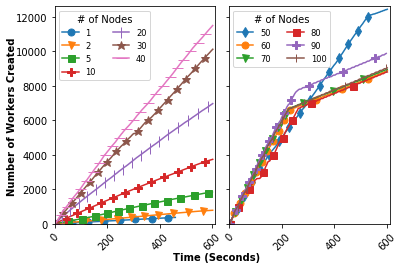

In [ ]:
# Making a two subplot plot for the manual scaling test.
df = pd.read_csv('experiments - Neo4j 10k.csv', delimiter=',', header=0)
plt.figure(figsize=(10,6), dpi=100)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'hspace': 0, 'wspace': .09})
ax1.plot(df['1'], range(len(df['70'])), label='1', marker='o', markersize=7, markevery=50)
ax1.plot(df['2'], range(len(df['70'])), label='2', marker='v', markersize=7, markevery=75)
ax1.plot(df['5'], range(len(df['70'])), label='5', marker='s', markersize=7, markevery=150)
ax1.plot(df['10'], range(len(df['70'])), label='10', marker='P', markersize=8, markevery=300)
ax1.plot(df['20'], range(len(df['70'])), label='20', marker='|', markersize=11, markevery=400)
ax1.plot(df['30'], range(len(df['70'])), label='30', marker='*', markersize=9, markevery=600)
ax1.plot(df['40'], range(len(df['70'])), label='40', marker='_', markersize=11, markevery=500)
ax2.plot(df['50'], range(len(df['70'])), label='50', marker='d', markersize=7, markevery=800)
ax2.plot(df['60'], range(len(df['70'])), label='60', marker='o', markersize=7, markevery=600)
ax2.plot(df['70'], range(len(df['70'])), label='70', marker='v', markersize=7, markevery=700)
ax2.plot(df['80'], range(len(df['70'])), label='80', marker='s', markersize=7, markevery=1000)
ax2.plot(df['90'], range(len(df['70'])), label='90', marker='P', markersize=8, markevery=800)
ax2.plot(df['100'], range(len(df['70'])), label='100', marker='|', markersize=8, markevery=1000)

ax1.set_xlim([0,610])
ax1.set_ylim([0, 12600])
ax2.set_xlim([0,610])
ax2.set_ylim([0, 12600])

ax1.legend(loc = 0, title='# of Nodes', ncol=2, fontsize='small')
ax2.legend(loc = 0, title='# of Nodes', ncol=2, fontsize='small')

for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

f.text(.5, 0, 'Time (Seconds)', ha='center', weight='bold')
f.text(.015, 0.5, 'Number of Workers Created', va='center', rotation='vertical', weight='bold')
plt.savefig('rateManualGraph.png', dpi=180)

In [ ]:
df = pd.read_csv('experiments - FastAPI.csv', delimiter=',', header=0)
plt.figure(figsize=(4,4), dpi=240)

#plt.boxplot([df['time_to_get - pods to host'], df['time_to_get - localhost'], df['time_to_get - AuraDB']])
#plt.boxplot(df['time_to_get - localhost'])
#plt.boxplot(df['time_to_get - AuraDB'])
data = [df['time_to_get - pods url to host'], df['time_to_get - localhost'], df['time_to_get - from pods-api via clusterIp']]
ax = sns.boxplot(data=data, fliersize=0, linewidth = 1.1)
# add stripplot
ax = sns.stripplot(data=data, color="blue", jitter=0.2, size=3)

#ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.grid(visible=True, linewidth=.11, axis="y")
plt.ylim([0, 1.5])
plt.xlim([-1, 3])
plt.xticks(ticks=[0,1,2],labels=['Pods API\nto Host', 'Local Pod\nto Host', 'Pods API\nto ClusterIP'], rotation=0, fontsize='small')
plt.ylabel('Roundtrip Request Time (s)', va='center', rotation='vertical', weight='bold')
#plt.xlabel('Amount of Nodes', ha='center', weight='bold')
#plt.ylabel('me (s)', va='center', rotation='vertical', weight='bold')
plt.savefig('fastapi.png', dpi=180)

## Manual Worker Creation Rate Graph

<Figure size 1000x600 with 0 Axes>

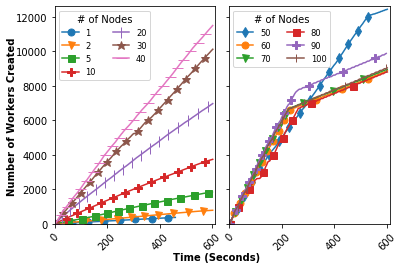

In [ ]:
# Making a two subplot plot for the manual scaling test.
df = pd.read_csv('experiments - Neo4j 10k.csv', delimiter=',', header=0)
plt.figure(figsize=(10,6), dpi=100)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'hspace': 0, 'wspace': .09})
ax1.plot(df['1'], range(len(df['70'])), label='1', marker='o', markersize=7, markevery=50)
ax1.plot(df['2'], range(len(df['70'])), label='2', marker='v', markersize=7, markevery=75)
ax1.plot(df['5'], range(len(df['70'])), label='5', marker='s', markersize=7, markevery=150)
ax1.plot(df['10'], range(len(df['70'])), label='10', marker='P', markersize=8, markevery=300)
ax1.plot(df['20'], range(len(df['70'])), label='20', marker='|', markersize=11, markevery=400)
ax1.plot(df['30'], range(len(df['70'])), label='30', marker='*', markersize=9, markevery=600)
ax1.plot(df['40'], range(len(df['70'])), label='40', marker='_', markersize=11, markevery=500)
ax2.plot(df['50'], range(len(df['70'])), label='50', marker='d', markersize=7, markevery=800)
ax2.plot(df['60'], range(len(df['70'])), label='60', marker='o', markersize=7, markevery=600)
ax2.plot(df['70'], range(len(df['70'])), label='70', marker='v', markersize=7, markevery=700)
ax2.plot(df['80'], range(len(df['70'])), label='80', marker='s', markersize=7, markevery=1000)
ax2.plot(df['90'], range(len(df['70'])), label='90', marker='P', markersize=8, markevery=800)
ax2.plot(df['100'], range(len(df['70'])), label='100', marker='|', markersize=8, markevery=1000)

ax1.set_xlim([0,610])
ax1.set_ylim([0, 12600])
ax2.set_xlim([0,610])
ax2.set_ylim([0, 12600])

ax1.legend(loc = 0, title='# of Nodes', ncol=2, fontsize='small')
ax2.legend(loc = 0, title='# of Nodes', ncol=2, fontsize='small')

for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

f.text(.5, 0, 'Time (Seconds)', ha='center', weight='bold')
f.text(.015, 0.5, 'Number of Workers Created', va='center', rotation='vertical', weight='bold')
plt.savefig('rateManualGraph.png', dpi=180)

## Autoscaler Worker Creation Rate Graph

<Figure size 1000x600 with 0 Axes>

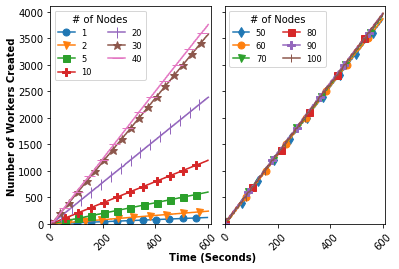

In [ ]:
# Making a two subplot plot for the auto scaling test.
df = pd.read_csv('AutoScaling.csv', delimiter=',', header=1)
plt.figure(figsize=(10,6), dpi=100)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'hspace': 0, 'wspace': .09})
ax1.plot(df['1'], range(len(df['70'])), label='1', marker='o', markersize=7, markevery=10)
ax1.plot(df['2'], range(len(df['70'])), label='2', marker='v', markersize=7, markevery=25)
ax1.plot(df['5'], range(len(df['70'])), label='5', marker='s', markersize=7, markevery=50)
ax1.plot(df['10'], range(len(df['70'])), label='10', marker='P', markersize=8, markevery=100)
ax1.plot(df['20'], range(len(df['70'])), label='20', marker='|', markersize=11, markevery=150)
ax1.plot(df['30'], range(len(df['70'])), label='30', marker='*', markersize=9, markevery=200)
ax1.plot(df['40'], range(len(df['70'])), label='40', marker='_', markersize=11, markevery=300)
ax2.plot(df['50'], range(len(df['70'])), label='50', marker='d', markersize=7, markevery=400)
ax2.plot(df['60'], range(len(df['70'])), label='60', marker='o', markersize=7, markevery=500)
ax2.plot(df['70'], range(len(df['70'])), label='70', marker='v', markersize=7, markevery=600)
ax2.plot(df['80'], range(len(df['70'])), label='80', marker='s', markersize=7, markevery=700)
ax2.plot(df['90'], range(len(df['70'])), label='90', marker='P', markersize=8, markevery=600)
ax2.plot(df['100'], range(len(df['70'])), label='100', marker='|', markersize=8, markevery=500)

ax1.set_xlim([0,610])
ax1.set_ylim([0, 12600])
ax2.set_xlim([0,610])
ax2.set_ylim([0, 4100])

ax1.legend(loc = 0, title='# of Nodes', ncol=2, fontsize='small')
ax2.legend(loc = 0, title='# of Nodes', ncol=2, fontsize='small')

for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

f.text(.5, 0, 'Time (Seconds)', ha='center', weight='bold')
f.text(.025, 0.5, 'Number of Workers Created', va='center', rotation='vertical', weight='bold')
plt.savefig('rateAutoGraph.png', dpi=180)

## Worker Creation Rate Comparison Graph

SCREENSHOT ME DUE TO SAVEFIG FIGURE BOUNDS 


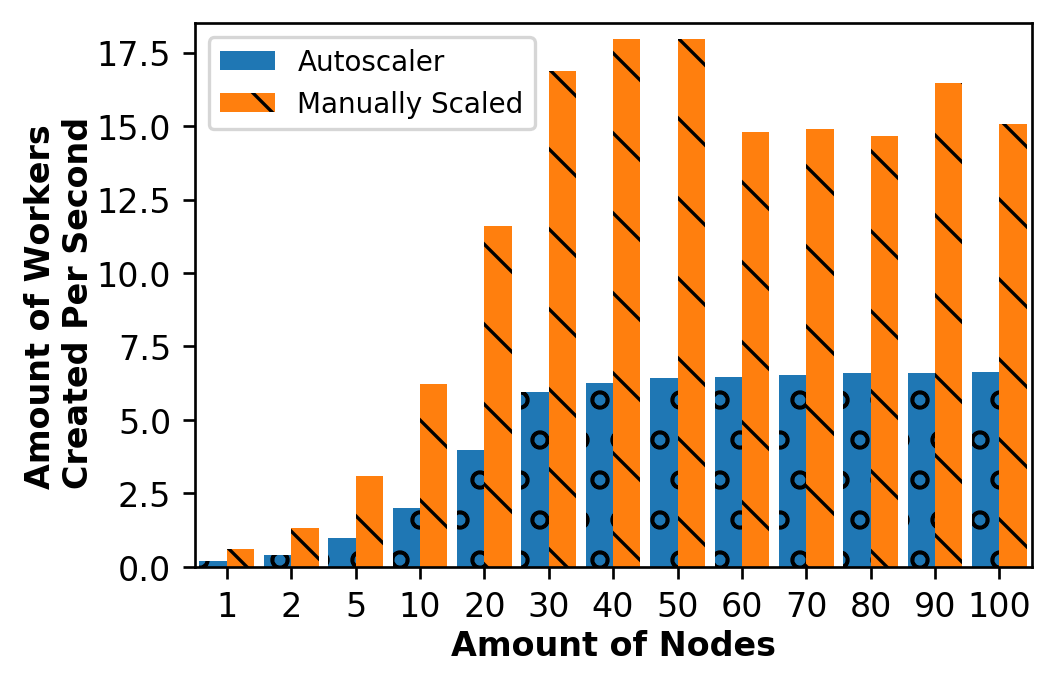

In [ ]:
# Making a plot to compare manual worker creation rate and autoscaler creation rate.
df = pd.read_csv('ManualScaling.csv', delimiter=',', header=1)
Nodes = df['1.1'][3:16]
ManualVals = df['2.1'][3:16]
AutoVals = df['5.1'][3:16]

plt.figure(figsize=(4.5,3), dpi=240)

x = np.arange(len(Nodes))  # the label locations
width = 0.425  # the width of the bars

#fig, ax = plt.subplots()
rects1 = plt.bar(x - width/2, list(map(float, ManualVals)), width, hatch="o")
rects2 = plt.bar(x + width/2, list(map(float, AutoVals)), width, hatch="\\")
plt.ylim([0, 18.5])
plt.xlim([-.5,12.5])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],[1,2,5,10,20,30,40,50,60,70,80,90,100])
plt.legend(['Autoscaler', 'Manually Scaled'], fontsize='small')

#plt.xlabel('')
plt.text(6, -3, 'Amount of Nodes', ha='center', weight='bold')
plt.text(-3.15, 9, 'Amount of Workers\nCreated Per Second', va='center', rotation='vertical', weight='bold')

#plt.savefig('rateComparisonGraph.png', dpi=180)
print('SCREENSHOT ME DUE TO SAVEFIG FIGURE BOUNDS ')

## Performance Graphs

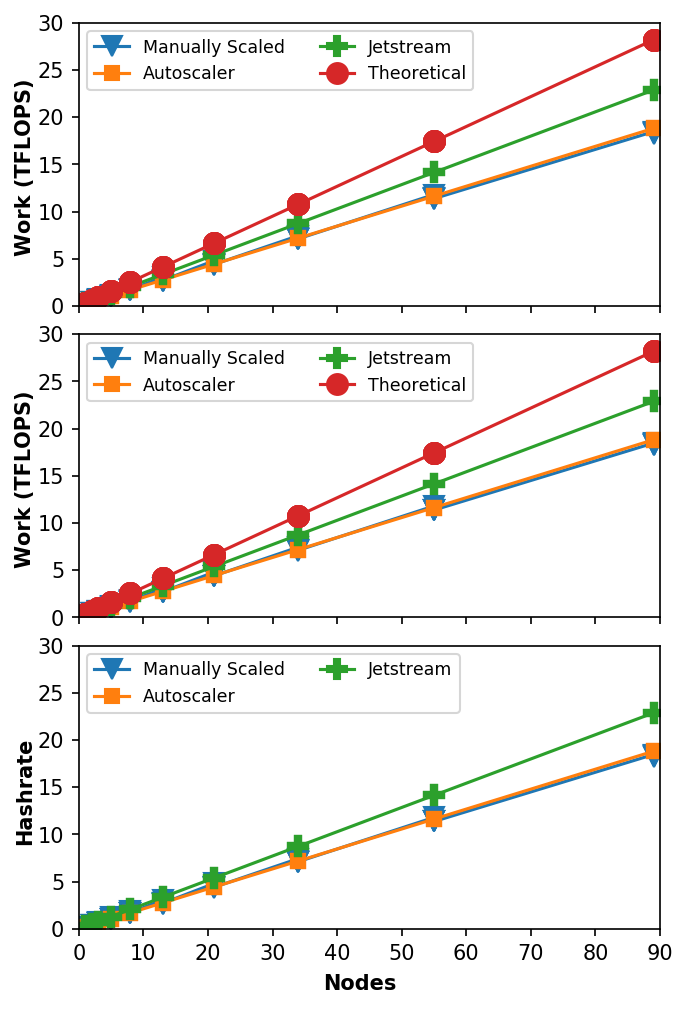

In [ ]:
# Making a plot to compare performance for all cases to go with performance table in paper.
# EasyFlops
df = pd.read_csv('EasyFlops.csv', delimiter=',', header=1)
EFManuallyScaledSpeed = df['GFlop/s Calc'][0:50]
EFAutoScaledSpeed = df['GFlop/s Calc.1'][0:50]
EFJetstreamSpeed = df['JS GFlops Calc'][0:50]
EFTheoreticalSpeed = df['Theory GFlops'][0:50]

# HardFlops
HFdf = pd.read_csv('HardFlops.csv', delimiter=',', header=1)
HFManuallyScaledSpeed = df['GFlop/s Calc'][0:50]
HFAutoScaledSpeed = df['GFlop/s Calc.1'][0:50]
HFJetstreamSpeed = df['JS GFlops Calc'][0:50]
HFTheoreticalSpeed = df['Theory GFlops'][0:50]

# Hashrate
df = pd.read_csv('Hashrate.csv', delimiter=',', header=1)
HRManuallyScaledSpeed = df['HASHRATE'][0:50]
HRAutoScaledSpeed = df['HASHRATE.1'][0:50]
HRJetstreamSpeed = df['JS Hashrate Script'][0:50]

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5,8), dpi=150, sharex=True, gridspec_kw={'hspace': .1, 'wspace': 0})

nodes = sorted(([1,2,3,5,8,13,21,34,55,89] * 5))

ax1.plot(nodes, list(map(float, EFManuallyScaledSpeed)), label='Manually Scaled', marker='v', markersize=10)
ax1.plot(nodes, list(map(float, EFAutoScaledSpeed)), label='Autoscaler', marker='s', markersize=7)
ax1.plot(nodes, list(map(float, EFJetstreamSpeed)), label='Jetstream', marker='P', markersize=10)
ax1.plot(nodes, list(map(float, EFTheoreticalSpeed)), label='Theoretical', marker='o', markersize=10)

ax2.plot(nodes, list(map(float, HFManuallyScaledSpeed)), label='Manually Scaled', marker='v', markersize=10)
ax2.plot(nodes, list(map(float, HFAutoScaledSpeed)), label='Autoscaler', marker='s', markersize=7)
ax2.plot(nodes, list(map(float, HFJetstreamSpeed)), label='Jetstream', marker='P', markersize=10)
ax2.plot(nodes, list(map(float, HFTheoreticalSpeed)), label='Theoretical', marker='o', markersize=10)

ax3.plot(nodes, list(map(float, HFManuallyScaledSpeed)), label='Manually Scaled', marker='v', markersize=10)
ax3.plot(nodes, list(map(float, HFAutoScaledSpeed)), label='Autoscaler', marker='s', markersize=7)
ax3.plot(nodes, list(map(float, HFJetstreamSpeed)), label='Jetstream', marker='P', markersize=10)

ax1.set_xlim([0, 90])
ax1.set_ylim([0, 30000])
ax1.set_yticklabels([0, 5, 10, 15, 20, 25, 30])

ax2.set_xlim([0, 90])
ax2.set_ylim([0, 30000])
ax2.set_yticklabels([0, 5, 10, 15, 20, 25, 30])

ax3.set_xlim([0, 90])
ax3.set_ylim([0, 30000])
ax3.set_yticklabels([0, 5, 10, 15, 20, 25, 30])

ax1.legend(loc = 0, ncol=2, fontsize='small')
ax2.legend(loc = 0, ncol=2, fontsize='small')
ax3.legend(loc = 2, ncol=2, fontsize='small')

f.text(.5, .074, 'Nodes', ha='center', weight='bold')
f.text(0.04, 0.76, 'Work (TFLOPS)', va='center', rotation='vertical', weight='bold')
f.text(0.04, 0.5, 'Work (TFLOPS)', va='center', rotation='vertical', weight='bold')
f.text(0.04, 0.24, 'Hashrate', va='center', rotation='vertical', weight='bold')
f.savefig('performanceGraphs.png', dpi=180)